First, connect to your drive so that collab can find the dataset that needs to be worked on.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Import the required packages and functions

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

Import the dataset from the csv (comma separated values) file using Pandas library

In [0]:
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Summer School/titanic_dataset.csv")

Next we are going to view the data with some useful functions in pandas library

In [17]:
df.head()  # Observe the attribute values for the first 5 users (rows) 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In the above dataset, the following attributes/features are present:


* **PassengerId**: passenger id
* **Pclass**: passenger class (1 for 1st, 2 for 2nd, 3 for 3rd)
* **Name**: name
*  **Sex**: gender
* **Age**: age
* **SibSp**: number of siblings/spouses aboard
* **Parch**: number of parents/children aboard
***Ticket**: ticket number
***Fare**: passenger fare(money paid for the trip) in British pound
***Cabin**: cabin number
***Embarked**: port where the passenger embarked (C for Cherbourg, Q for Queenstown, S for Southampton)
***Survived**: whether the passenger survived or not (0 for no and 1 for yes)


---







* **Nominal Features (within Categorical)**: Sex and Embarked
* **Binary (within Categorical)**: Survived
* **Ordinal (within Categorical)**: Pclass
* **Continuous**: Age and Fare (can be turned to interval-based)
* **Discrete**: SibSp, Parch
* **Mixed Type**: Ticket
* **Vector Object**: Name (text)


In [0]:
df.tail()  # Observe the attribute values for the last 5 users (rows)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


In [0]:
# Check the dimensions
data_shape = df.shape
print(data_shape)

(1309, 12)


This tells us that the titanic dataset has 1309 rows and 12 columns (i.e. features).

In [0]:
# Check the type of the dataset
type(df)

pandas.core.frame.DataFrame

In [0]:
# Get a summary description of the data
df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309.000000
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,NaN
mean,655.000000,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,0.377387
std,378.020061,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,0.484918
min,1.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,328.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,655.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,982.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,1.000000


In [0]:
# Count the number of observations present
df.count()

PassengerId    1309
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1308
Cabin           295
Embarked       1307
Survived       1309
dtype: int64

# Data Cleaning

## Missing Values

From the above results, we can notice that some attributes like Age, Fare, Cabin, and Embarked have less value count than the rest or the actual amount of passengers or rows. This tells us that these attributes have missing values. 
Consequently, we will now try to fill those missing values. The possible solutions for such case are:
* Ignoring them: if they are many or when you have missing information that you need to fill these values (for example, a certain class label). This of course might give a bad performance.
* Using a global constant for these missing values: for example putting them all as "unknown" or NA.
* Filling them with the mean of their respective attribute (or median if it's discrete).
*  Filling them with the mean of their respective attribute but within the same class: example taking the average mean of only thos who survived instead of everyone (it depends if it makes more sense).

Here, we will fill the missing values with the mean of their respective attribute. This is done below.


In [18]:
df.fillna(df.mean(), inplace=True)
df.count()

PassengerId    1309
Pclass         1309
Name           1309
Sex            1309
Age            1309
SibSp          1309
Parch          1309
Ticket         1309
Fare           1309
Cabin           295
Embarked       1307
Survived       1309
dtype: int64

## Row Reduction

We can see above that this filled the numerical continuous-valued attributes. For the non-numerical categorical ones like Cabin and Embarked, we need another method. For Embarked, since only two values are missing and we can't find a way to know which port these had, we can simply drop their rows (they are only two so they won't affect the result much). This is a method of row reduction. Another option (instead of dropping) can be filling them with the most frequent value.

In [19]:
out_embarked = df[df['Embarked'].isnull()]
df.drop(out_embarked.index, inplace=True)
df.count()

PassengerId    1307
Pclass         1307
Name           1307
Sex            1307
Age            1307
SibSp          1307
Parch          1307
Ticket         1307
Fare           1307
Cabin           293
Embarked       1307
Survived       1307
dtype: int64

## Duplicates

In some cases, especially if the data is collected from different sources, there might be duplicate entries existing in the database. In this case, we need to drop them since they can affect the result. Below, we can see that the dataset has no duplicates, so no action is needed.

In [20]:
print('Dataset has duplicates? ', df.duplicated())  # Check for duplicates in the whole dataset
# You can also check for duplicates in specific attributes
print('Passenger Id is duplicated? ', df.duplicated('PassengerId'))

# No duplicates are present, but if they are, the following method can be used to drop them:
df.drop_duplicates()
df.drop_duplicates(['PassengerId'])  # for a specific attribute

Dataset has duplicates?  0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1279    False
1280    False
1281    False
1282    False
1283    False
1284    False
1285    False
1286    False
1287    False
1288    False
1289    False
1290    False
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
1299    False
1300    False
1301    False
1302    False
1303    False
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1307, dtype: bool
Passenger Id is duplicated?  0       False
1       False
2       False
3       False
4       Fa

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
5,6,3,"Moran, Mr. James",male,29.881138,0,0,330877,8.4583,NaN,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1


Note that you should be careful with what attributes you actually check for duplicates. For example, if we check for duplicates in ticket number like in the code below, it'll turn out that there are duplicates for that attribute. However, a closer look shows us that those having same ticket numbers are siblings or couples hence these duplicates are valid and should not be removed since they represent different people.

In [21]:
print(df.duplicated('Ticket'))
print('\n These duplicates exist at:')
df[df.duplicated('Ticket')].index  # To check where these duplicates are present (at what indices)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24       True
25      False
26      False
27      False
28      False
29      False
        ...  
1279    False
1280     True
1281     True
1282     True
1283     True
1284    False
1285     True
1286     True
1287    False
1288     True
1289    False
1290    False
1291     True
1292     True
1293     True
1294     True
1295    False
1296    False
1297    False
1298     True
1299    False
1300     True
1301    False
1302     True
1303    False
1304    False
1305     True
1306    False
1307    False
1308     True
Length: 1307, dtype: bool

 These duplicates exist at:


Int64Index([  24,   71,   88,  117,  119,  120,  122,  124,  125,  137,
            ...
            1288, 1291, 1292, 1293, 1294, 1298, 1300, 1302, 1305, 1308],
           dtype='int64', length=379)

## Column Reduction (Dimensionality Reduction)

Since Cabin has many missing values and might not contribute a lot to the survival probability, we can drop it. Moreover, as we've seen before, Ticket has many duplicates and is also not related to survival. Hence it'll be dropped as well. Similarly, PassengerId and Name are not correlated with survival and can be dropped.

In [22]:
df = df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis=1)
df.count()

Pclass      1307
Sex         1307
Age         1307
SibSp       1307
Parch       1307
Fare        1307
Embarked    1307
Survived    1307
dtype: int64

## Outliers

## Using the equation

As you recall in the guide, a known way to detect outliers can be by calculating IQR (inter-quartile range) and then, all points above Q3+1.5xIQR or below Q1-1.5xIQR can be considered outliers. Outliers are usually searched for in continuous-valued attributes like Age and Fare here. Others have certain categories, hence no possibility for weird or unconsidered data values. Let us try to apply the above formulation to Age and Fare.

In [0]:
# For Age
Q1_age = np.percentile(df['Age'],25)
Q3_age = np.percentile(df['Age'],75)
IQR = Q3_age - Q1_age 
outlier_score_upper = Q3_age + IQR*1.5 
outlier_score_lower = Q1_age - IQR*1.5 

print('First quartile for age = ',Q1_age)
print('Third quartile for age = ',Q3_age)
print('Interquartile range age = ',IQR)
print('Upper Outlier Threshold = ',outlier_score_upper)
print('Lower Outlier Threshold = ',outlier_score_lower)

# Let's see which values are considered outliers according to the formulation
out_age = df[df['Age'] > outlier_score_upper].index  
out_age_2 = df[df['Age'] < outlier_score_lower].index
print('The number of outliers: ', len(out_age)+len(out_age_2))

First quartile for age =  22.0
Third quartile for age =  35.0
Interquartile range age =  13.0
Upper Outlier Threshold =  54.5
Lower Outlier Threshold =  2.5
The number of outliers:  100


If we observe the results above, we can see that ages above 54.5 and below 2.5 are considered outliers according to the formulation. However, these ages are considered normal in addition to playing an important role in figuring out survival, so we decided to keep them. 

In [0]:
# For Fare
Q1_fare = np.percentile(df['Fare'],25)
Q3_fare = np.percentile(df['Fare'],75)
IQR_fare = Q3_fare - Q1_fare
outlier_score_upper = Q3_fare + IQR_fare*1.5 
outlier_score_lower = Q1_fare - IQR_fare*1.5 

print('First quartile for ticket prices = ',Q1_fare)
print('Third quartile for ticket prices = ',Q3_fare)
print('Interquartile range for ticket prices = ',IQR_fare)
print('Upper Outlier Threshold for ticket prices = ',outlier_score_upper)
print('Lower Outlier Threshold for ticket prices = ',outlier_score_lower)

# Let's see which values are considered outliers according to the formulation
out_fare = df[df['Fare'] > outlier_score_upper].index  
out_fare_2 = df[df['Fare'] < outlier_score_lower].index
print('The number of outliers: ', len(out_fare)+len(out_fare_2))

First quartile for ticket prices =  7.8958
Third quartile for ticket prices =  31.275
Interquartile range for ticket prices =  23.379199999999997
Upper Outlier Threshold for ticket prices =  66.34379999999999
Lower Outlier Threshold for ticket prices =  -27.172999999999995
The number of outliers:  169


Using this formulation gave us a big amount of outliers. We will find out next that this is not the best way to identify outliers since we need to take into consideration the case. A better way can be through visualization of the data, which is what we're doing next.

### Using Visualization (Boxplots)

Let us try to observe outliers for Fare using boxplots.

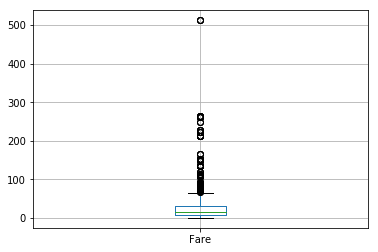

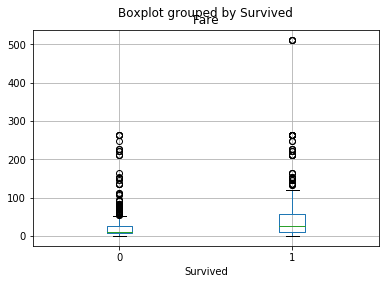

In [23]:
df.boxplot(column=['Fare'])
df.boxplot(column=['Fare'], by='Survived')

From the plot above, we can see that dropping all prices above 66 doesn't seem logical anymore since by doing so, we're losing a lot of useful information. Moreover, we can now easily see which outliers are really far from the data and hence, which to drop. Above, we can see an obvious outlier above 500. This is better dropped since it might lead the model later to take biased decisions for ticket prices close to 500 (according to the only data it sees present there). For example, ticket prices above 500 here are associated only with survival. Therefore, if a test passenger comes later with ticket price above 500, the model will directly assume he/she will survive. This is also observed when checking if the data is balanced.

In [24]:
# Drop Fare Outliers
fare_outliers = df[df['Fare']>500]
print(fare_outliers)  # Print the outlier rows
df.drop(fare_outliers.index, inplace=True)

      Pclass     Sex   Age  SibSp  Parch      Fare Embarked  Survived
258        1  female  35.0      0      0  512.3292        C         1
679        1    male  36.0      0      1  512.3292        C         1
737        1    male  35.0      0      0  512.3292        C         1
1234       1  female  58.0      0      1  512.3292        C         1


# Data Transformation

## Normalization

Observing boxplots of Fare (before) and Age (below), we can notice that the data is skewed. That is, the distribution over the attribute values is not uniform and there is a big difference range among most values, where we can see most passengers lie below 30s in Age and Fare (third quartile indicates the ceiling for 75% of the data). In such case, it's better to normalize the values, so that significantly larger or smaller values don't give wrong indications to the model, and so that the model doesn't become biased.
Normalizing can be done using either min-max or the z-score ((x-mean)/std). The latter is better when you're normalizing the target variable (which is to be predicted later) since it needs to be reversible. Here, we will normalize using maximum.

When different numerical attributes have different value ranges, it's better to normalize them so that no attribute is preferred over another by the model only due to the difference in value. Same goes to every attribute on its own, we basically want the model to focus on the RELATIVE values (relative to each other, the distance between them) and not the actual values (so that significantly larger or smaller values don't give wrong indications to the model).
Normalizing can be done using either min-max or the z-score ((x-mean)/std). The latter is better when you're normalizing the target variable (which is to be predicted later) since it needs to be reversible. Here, we will normalize using maximum.

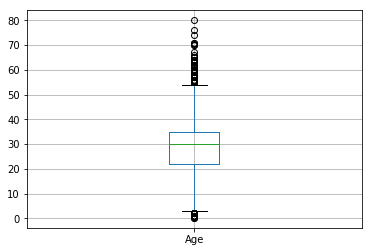

In [25]:
# Age Boxplot
df.boxplot(column=['Age'])

In [26]:
# Normalize Age 
max_age = max(df['Age'])
df['Age'] = df['Age']/max_age

# Normaliza Fare
max_fare = max(df['Fare'])
df['Fare'] = df['Fare']/max_fare

df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,2.300844,0.372702,0.501151,0.385265,0.120735,0.374520
std,0.835130,0.160671,1.043504,0.866955,0.169128,0.484185
min,1.000000,0.002125,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.275000,0.000000,0.000000,0.030022,0.000000
50%,3.000000,0.373514,0.000000,0.000000,0.054959,0.000000
75%,3.000000,0.437500,1.000000,0.000000,0.117871,1.000000
max,3.000000,1.000000,8.000000,9.000000,1.000000,1.000000


## Encoding

Since we need to give the model the data in numerical form, we still have to encode Sex and Embarked to change them into numbers. Encoding assigns a number (integer or binary or others) to every class in the categorical attribute. Let's try to substitute female with 1 and male with 0 for sex (binary encoding), and assign a number for each of S, C, and Q in Embarked.

In [27]:
print(df.head(6))  # Observe the attribute values for the first 6 users (rows)

# Encode Sex Attribute
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

# Encode Embarked Attribute
lb_make = preprocessing.LabelEncoder()
df['Embarked'] = lb_make.fit_transform(df['Embarked'])

df.head(6)

   Pclass     Sex       Age  SibSp  Parch      Fare Embarked  Survived
0       3    male  0.275000      1      0  0.027567        S         0
1       1  female  0.475000      1      0  0.271039        C         1
2       3  female  0.325000      0      0  0.030133        S         1
3       1  female  0.437500      1      0  0.201901        S         1
4       3    male  0.437500      0      0  0.030608        S         0
5       3    male  0.373514      0      0  0.032161        Q         0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,0.275000,1,0,0.027567,2,0
1,1,1,0.475000,1,0,0.271039,0,1
2,3,1,0.325000,0,0,0.030133,2,1
3,1,1,0.437500,1,0,0.201901,2,1
4,3,0,0.437500,0,0,0.030608,2,0
5,3,0,0.373514,0,0,0.032161,1,0


We can see that the encoding assigned a 0 for C, 1 for Q, and 2 for S. We are now done preprocessing the data, and it's ready to be used. Let's save the processed and clean data to be used later by the models.

In [0]:
with open('gdrive/My Drive/Colab Notebooks/Summer School/clean_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)

# Data Visualization

Visualizing data is extremely important in deciding what preprocessing steps are needed and in evaluating the importance and the effect of certain attributes on the targetted variable. In what follows, we will try different plots and analyze correlations between different variables. 

In [0]:
# We need the data before normalization and encoding to better analyze it
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Summer School/titanic_dataset.csv")
df.fillna(df.mean(), inplace=True)

## Univariate 

### Histogram

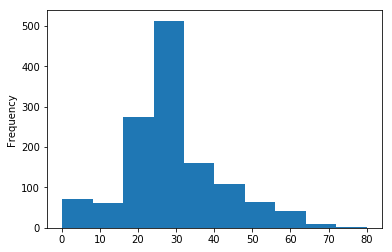

In [48]:
# Plot Histogram of Age
df['Age'].plot.hist()

Histograms can show us the distribution of data among the different attribute classes to have an insight if this data is balanced or not with respect to that attribute. Here, we can see that significantly more entries have ages between 20 and 30, hence we have imbalanced data regarding the age (not evenly distributed across the ages present). Having imbalanced data can sometimes negatively affect the model where having very few samples for certain classes might give it misguided information about their effect on the prediction hence causing a biased response.Thus, it's important to view the distribution of data over the classes of each attribute.

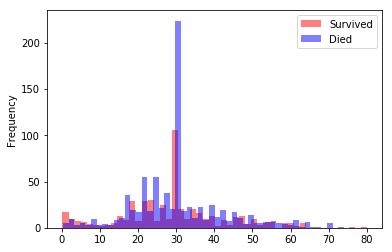

In [49]:
# Observe Effect of Age on Survival
survived = df[df["Survived"] == 1]
died = df[df["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

The above figure can show us the effect of age on survival. From observing such histograms, we can conclude what the model will later most probably conclude on its own. For example here, we can see that children and old people were most likely to survive. Hence, there is a correlation between age and survival.

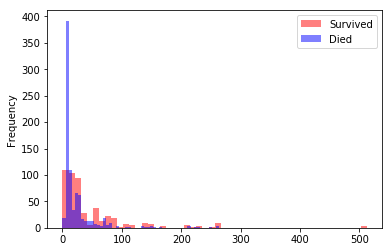

In [50]:
# Observe Effect of Fare on Survival
survived = df[df["Survived"] == 1]
died = df[df["Survived"] == 0]
survived["Fare"].plot.hist(alpha=0.5,color='red',bins=50)
died["Fare"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

Such "feature importance" observations can be done to all features or attributes. Here, we can see that there is also a correlation between Fare or ticket price and survival where richer people were more likely to survive, and we can see more deaths among the poor. Let's try next to see if sex had any effect on survival.

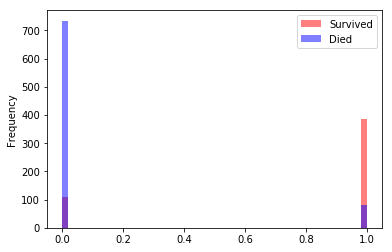

In [51]:
# Encode Sex attribute first since we need numerical data for the histogram
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

# Observe Effect of Sex on Survival
survived = df[df["Survived"] == 1]
died = df[df["Survived"] == 0]
survived["Sex"].plot.hist(alpha=0.5,color='red',bins=50)
died["Sex"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

We can see that gender did have an effect on survival where around 75% of the females survived whereas only 14% of the males did. Hence, females had more chances of survival. This makes sense since mothers and their children were the first ones saved.

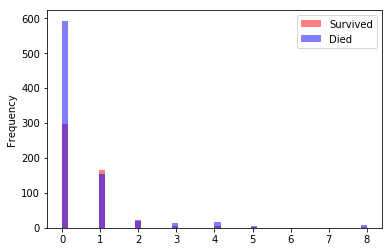

In [52]:
# Let's now observe the effect of number of siblings on Survival
survived = df[df["Survived"] == 1]
died = df[df["Survived"] == 0]
survived["SibSp"].plot.hist(alpha=0.5,color='red',bins=50)
died["SibSp"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

No clear relation between the number of siblings and survival can be noticed here. An interesting approach you can try on your own is joining the SibSp and Parch (number of parents/children) into one attribute and changing it to binary where 1 indicates that this person has a family member on board and 0 for not having family members aboard. If you observe this resulting attribute, you might actually see that having a family member decreased the chance of survival for the respective person.

### Pie Charts

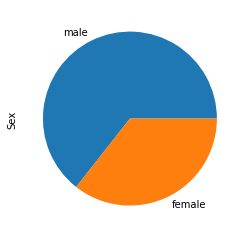

In [53]:
# Use the data before encoding Sex to visualize the labels
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Summer School/titanic_dataset.csv")
df.fillna(df.mean(), inplace=True)

df['Sex'].value_counts().plot(kind='pie')

Pie charts can also help in checking the balance of data for a certain attribute. Here we can see that there were more males than females within the passengers. 

### Boxplots

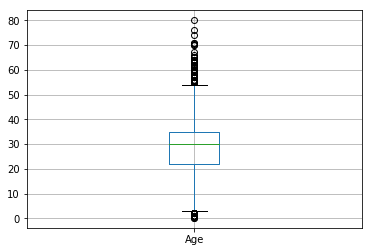

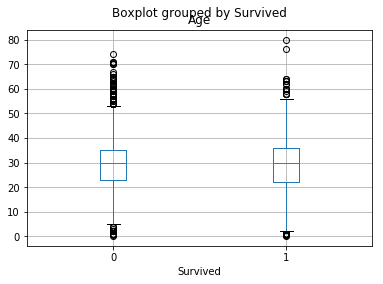

In [54]:
df.boxplot(column=['Age'])
df.boxplot(column=['Age'], by='Survived')

Boxplots can also help us observe the distribution of data (balanced or not) and the effect of each feature or its importance as we have tried to do in histograms. Bear in mind that the upper side of the box is the third quartile which shows us below which value 75% of the data are.

## Bivariate

### Scatter Plots

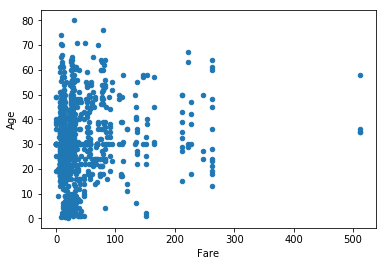

In [55]:
df.plot.scatter(x='Fare', y='Age')

Scatter plots show the correlation between two variables. The above plot shows that there is no correlation between Age and Fare. Below images show positive correlation between two variables (one increases/decreases as the other increases/decreases) and negative correlation (one increases as the other decreases or the opposite).


![alt text](https://www.latestquality.com/wp-content/uploads/2018/05/interpreting-a-scatter-plot.jpg)

Let us now try to separate data based on scatter plots.

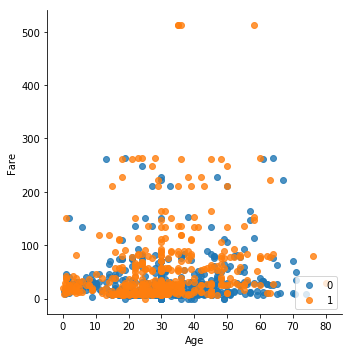

In [56]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Age", y="Fare", data=df, fit_reg=False, hue='Survived', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

We can see that it's very hard to draw a clear separation between Survived/Didn't Survive based on Fare and Age. Next, we will put some random values to show how data can be separable. 

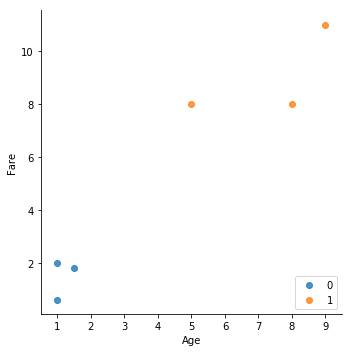

In [57]:
X = np.array([[1,2],   # contains a column for Fare and a column for Age
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])
y = [0,1,0,1,0,1]     # Represents Survived
dff = pd.DataFrame({'Age': X[:,0], 'Fare': X[:,1], 'Survived': y})
sns.lmplot(x="Age", y="Fare", data=dff, fit_reg=False, hue='Survived', legend=False)
plt.legend(loc='lower right')

Note here that we can draw a clear separation (a line) between those who survived and those who didn't based on their age and fare. Such separation will be done by several models that we will see later.